# _Unsupervised Learning:   Hierarchical Clustering and K-Means_


## Agglomerative Hierarchical Clustering

Useful readings can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) and [here](https://en.wikipedia.org/wiki/Hierarchical_clustering).


### Short Demo

In [74]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
# Values extracted from the official scikit-learn documentation (check the first link).
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

In [35]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

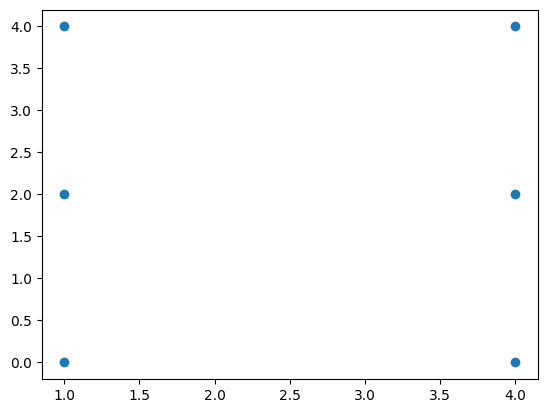

In [36]:
# Visualise data
plt.scatter(X[:,0], X[:,1])

In [37]:
# Agglomerative Hierarchical Clustering model with no parameters
aggl_model_demo = AgglomerativeClustering().fit(X)

In [38]:
aggl_model_demo

AgglomerativeClustering()

In [39]:
# Cluster labels for each point
aggl_model_demo.labels_

array([1, 1, 1, 0, 0, 0])

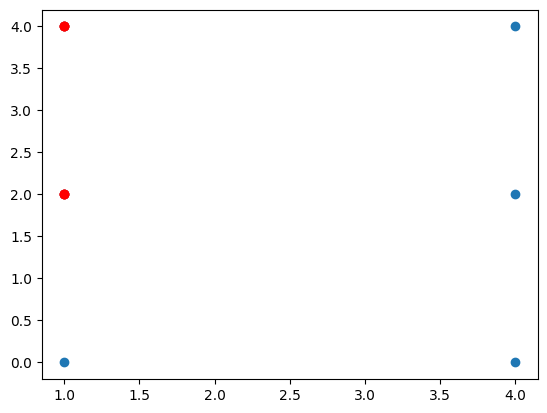

In [40]:
# Visualise data

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[aggl_model_demo.labels_,0], X[aggl_model_demo.labels_,1], c='r')

### Task 0

Play around with `data.txt` and:
* Plot data before applying the _Agglomerative Hierarchical Clustering_ algorithm (**TO DO1**);
* **TO DO2**:
    - Define a new variable _X_ to store `data_txt`,
    - Apply the _Agglomerative Hierarchical Clustering_ algorithm and modify its parameters for 15 clusters;
    - Write down your observations for different values of `affinity` (_"euclidean"_ or _"manhattan"_) and `linkage` (_"ward"_ or _"complete"_);
* Visualise the obtained clusters.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

In [41]:
# Load data for this exercise
data_txt = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

In [42]:
data_txt

array([[665845., 557965.],
       [597173., 575538.],
       [618600., 551446.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])

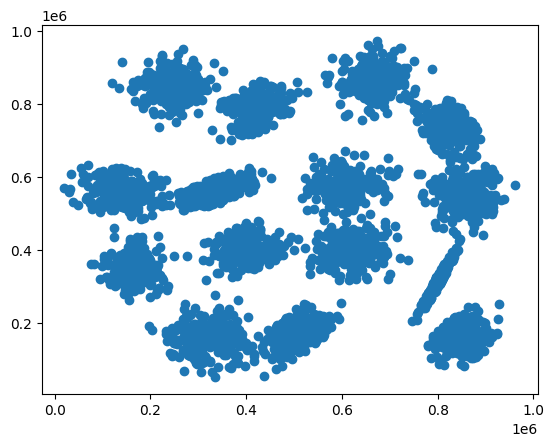

In [43]:
plt.scatter(data_txt[:,0], data_txt[:,-1])
plt.show()

In [44]:
# TO DO2
X = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

# Define model
aggl_model = AgglomerativeClustering(n_clusters = 15)
# Use the fit_predict() function
y_predict = aggl_model.fit_predict(X)

# Get the labels and use them in your plot


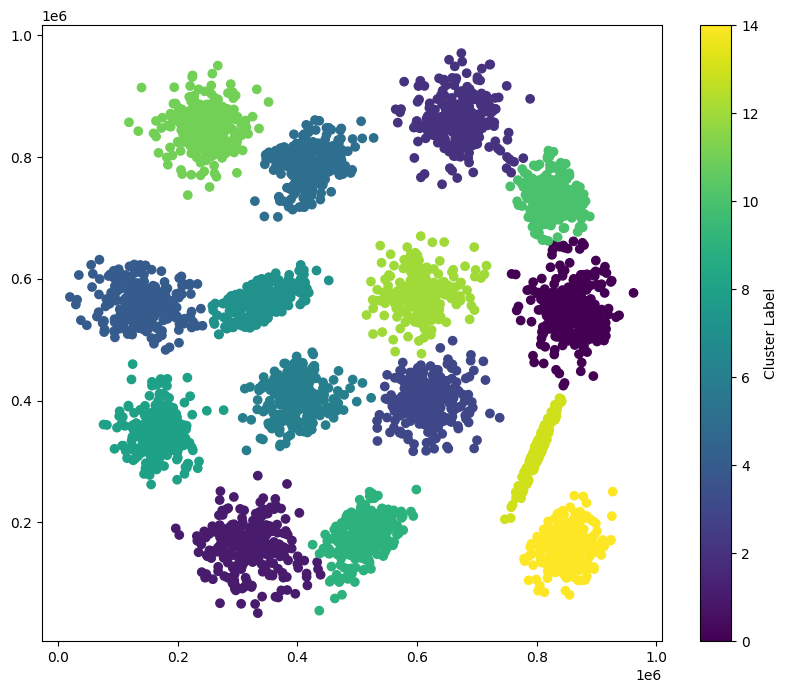

In [45]:
# Expected plot for TO DO2
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, -1], c=y_predict)
plt.colorbar(label="Cluster Label")
plt.show()

**TO DO3**: Use the _Nearest Centroid_ [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) to compute the centroids of each cluster.

In [46]:
# TO DO3
# Expected Output:
#centroid_model = NearestCentroid()
#centroid_model.fit(X, y_predict)
#centroids = centroid_model.centroids_
centroids = NearestCentroid().fit(X, y_predict)
print('Centroids:')
print(centroids.predict(data_txt))

Centroids:
[12 12 12 ...  2  2  2]


**TO DO4:** Iterate through the obtained labels and visualise each cluster with its corresponding centroid.

[[858523.47107438 549109.0137741 ]
 [321607.60349854 161194.23323615]
 [672400.67597765 861555.2849162 ]
 [619663.6884273  398658.75074184]
 [140019.83526012 558305.60115607]
 [417799.69426752 787001.99363057]
 [399223.625      404923.23579545]
 [337858.94189602 562276.80428135]
 [167727.3880597  348147.6       ]
 [508441.62931034 176054.77873563]
 [823717.6744186  733102.37209302]
 [244654.8856305  847642.04105572]
 [606060.5959596  574146.15824916]
 [802138.44551282 319314.90384615]
 [852675.82769231 157386.94461538]]


/var/folders/00/kw13960d363bs4vmtljv4r8r0000gn/T/ipykernel_2949/2798263085.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap="tab10", label=f"Cluster {cluster_label}", alpha=0.6)


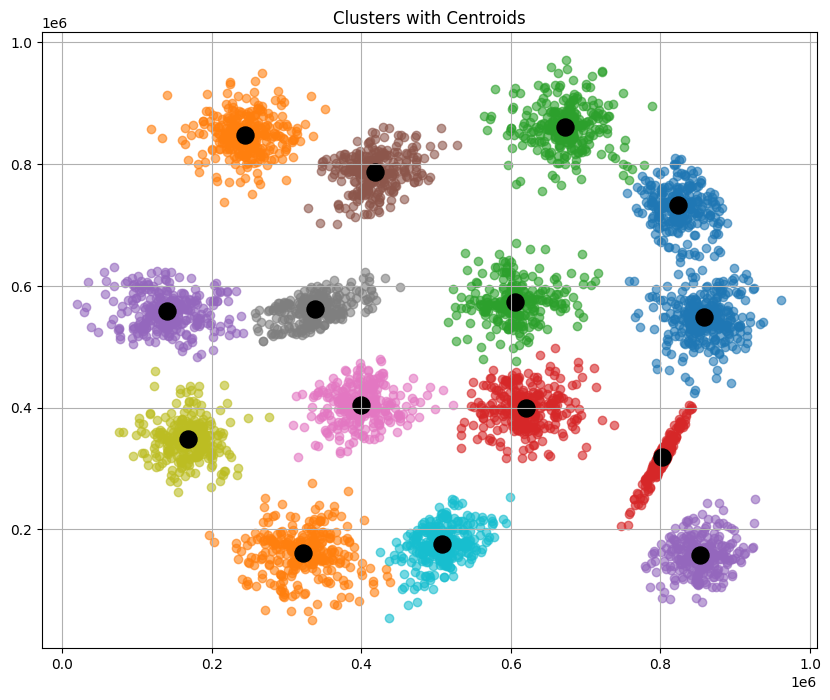

In [59]:
centroid_model = NearestCentroid()
centroid_model.fit(X, y_predict)
centroids = centroid_model.centroids_
print(centroids)

plt.figure(figsize=(10, 8))
for cluster_label in range(15):
    cluster_points = X[y_predict == cluster_label]

    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_label}", alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='o', s=150, label='Centroids')

plt.title("Clusters with Centroids")
plt.grid(True)
plt.show()

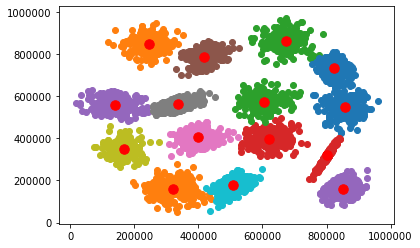

In [ ]:
# Expected Output:

## K-Means

Please refer to this [document](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more information.

### Task 1

Play around with `data.txt` and:
* **TO DO1**: Apply the _K-Means Clustering_ algorithm and generate 15 clusters;
* **TO DO2**: Write down your observations for the `algorithm` parameter (_"lloyd"_ or _"elkan"_);
* **TO DO3**: Compute the centroids for each cluster;
* **TO DO4**: Visualise the obtained clusters with their corresponding centroids.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

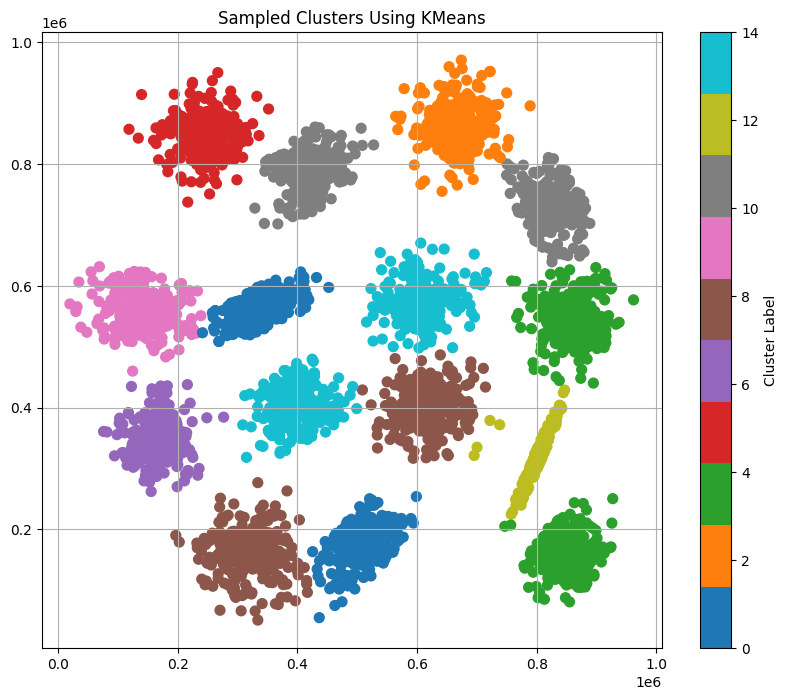

In [69]:
# TO DO1
k_algorithm = KMeans(init="k-means++", max_iter=500, n_clusters=15, algorithm='lloyd', random_state=42)
k_sample = k_algorithm.fit_predict(X)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, -1], c=k_sample, cmap='tab10', s=50)
plt.title("Sampled Clusters Using KMeans LLoyd")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

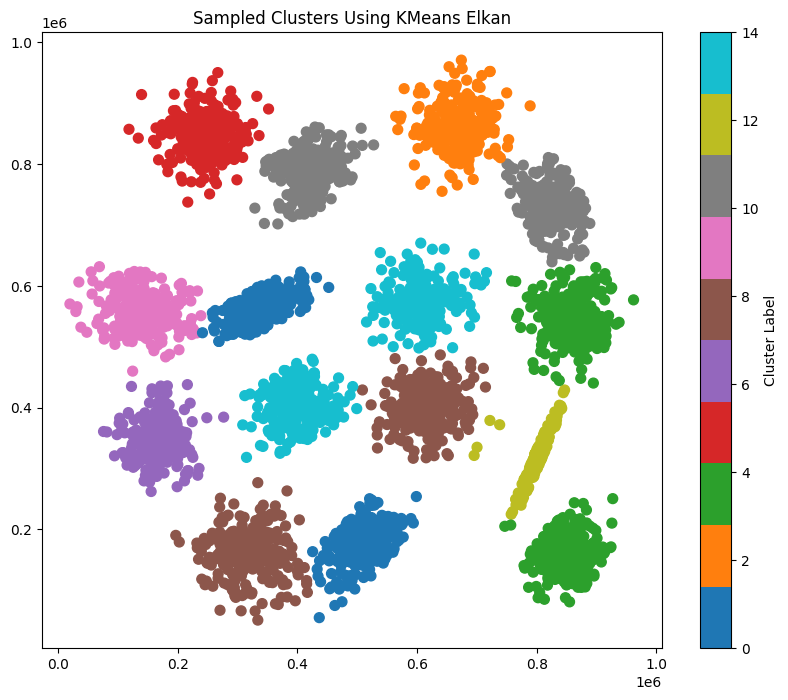

In [72]:
# TO DO2
k_algorithm_elkan = KMeans(init="k-means++", n_clusters=15, algorithm='elkan', random_state=42)
k_sample_elkan = k_algorithm_elkan.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=k_sample_elkan, cmap='tab10', s=50)
plt.title("Sampled Clusters Using KMeans Elkan")
plt.colorbar(label="Cluster Label")
plt.show()

In [75]:
# TO DO3
print(k_algorithm.cluster_centers_)
print(k_algorithm_elkan.cluster_centers_)

# Inertia
print(f"Inertia (Lloyd): {k_algorithm.inertia_}")
print(f"Inertia (Elkan): {k_algorithm_elkan.inertia_}")

# Silhouette Score
silhouette_lloyd = silhouette_score(X, k_algorithm.labels_)
silhouette_elkan = silhouette_score(X, k_algorithm_elkan.labels_)
print(f"Silhouette Score (Lloyd): {silhouette_lloyd:.4f}")
print(f"Silhouette Score (Elkan): {silhouette_elkan:.4f}")

[[337565.11890244 562157.17682927]
 [507818.31339031 175610.41595441]
 [670929.06818182 862765.73295454]
 [858947.97134671 546259.65902579]
 [852058.45259939 157685.52293578]
 [244654.8856305  847642.04105572]
 [167856.14071856 347812.71556886]
 [617601.91071429 399504.21428571]
 [320602.55       161521.85      ]
 [139682.37572254 558123.40462428]
 [417799.69426752 787001.99363057]
 [823421.2507837  731145.27272727]
 [801616.78164557 321123.34177215]
 [398555.94857143 404855.06857143]
 [606380.41554054 574534.59121622]]
[[337565.11890244 562157.17682927]
 [507818.31339031 175610.41595441]
 [670929.06818182 862765.73295454]
 [858947.97134671 546259.65902579]
 [852058.45259939 157685.52293578]
 [244654.8856305  847642.04105572]
 [167856.14071856 347812.71556886]
 [617601.91071429 399504.21428571]
 [320602.55       161521.85      ]
 [139682.37572254 558123.40462428]
 [417799.69426752 787001.99363057]
 [823421.2507837  731145.27272727]
 [801616.78164557 321123.34177215]
 [398555.94857143 4

In [ ]:
# Expected Output:
centroids

array([[320602.55      , 161521.85      ],
       [858947.97134671, 546259.65902579],
       [337264.76291793, 562123.37993921],
       [417799.69426752, 787001.99363057],
       [852058.45259939, 157685.52293578],
       [507818.31339031, 175610.41595441],
       [606380.41554054, 574534.59121622],
       [139395.22898551, 558143.94202899],
       [670929.06818182, 862765.73295454],
       [244654.8856305 , 847642.04105572],
       [801616.78164557, 321123.34177215],
       [617926.67761194, 399415.94925373],
       [398870.04843305, 404924.06552707],
       [823421.2507837 , 731145.27272727],
       [167856.14071856, 347812.71556886]])

I haven't observed any differences in the metrics I nor the plots. However, elkan algorithm should be more fitted for this type of dataset (as it is not that big) while lloyd should be more efficient for higher datasets.

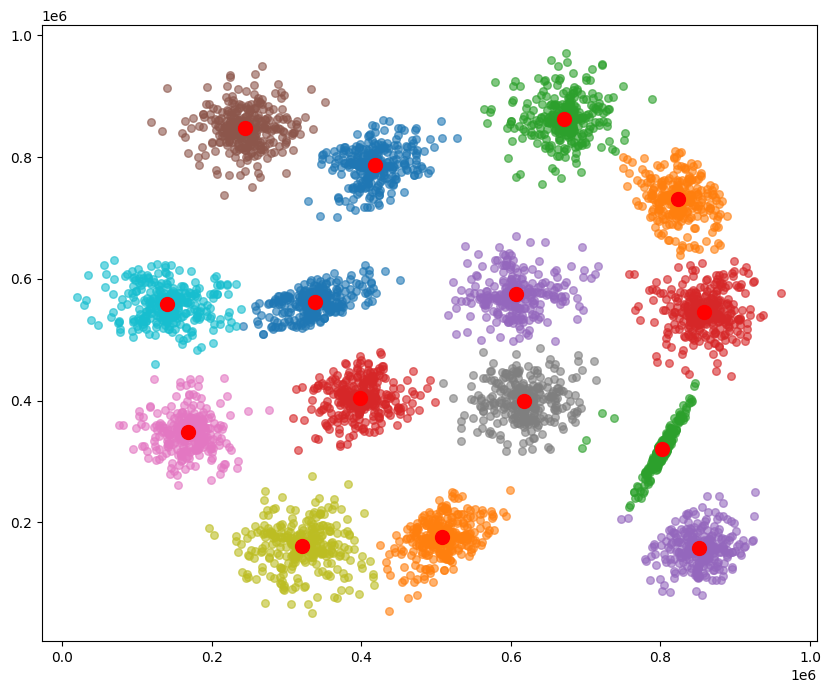

In [66]:
plt.figure(figsize=(10, 8))
for cluster_label in range(15):
    cluster_points = X[k_sample == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.6)
plt.scatter(k_algorithm.cluster_centers_[:, 0], k_algorithm.cluster_centers_[:, 1], c='red',marker='o', s=100)
plt.show()
# TO DO4

### Task 2

Try to modify the number of clusters for `data2.txt` and write down your observations for the _Agglomerative Hierarchical Clustering_ model.

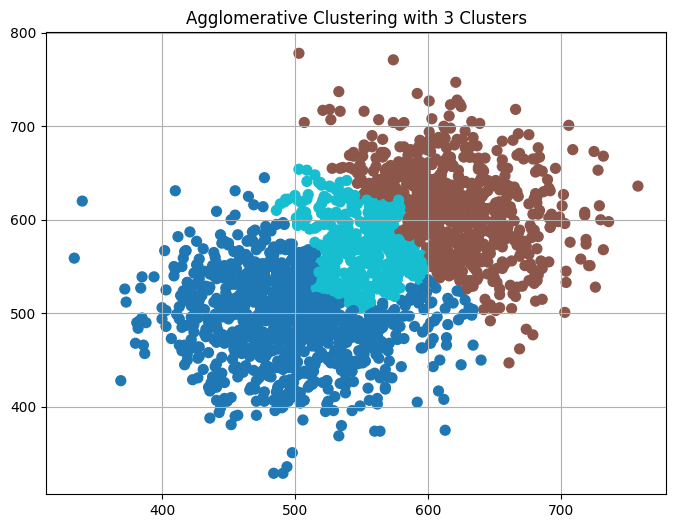

Number of clusters: 3
Labels Distribution: [947 706 394]


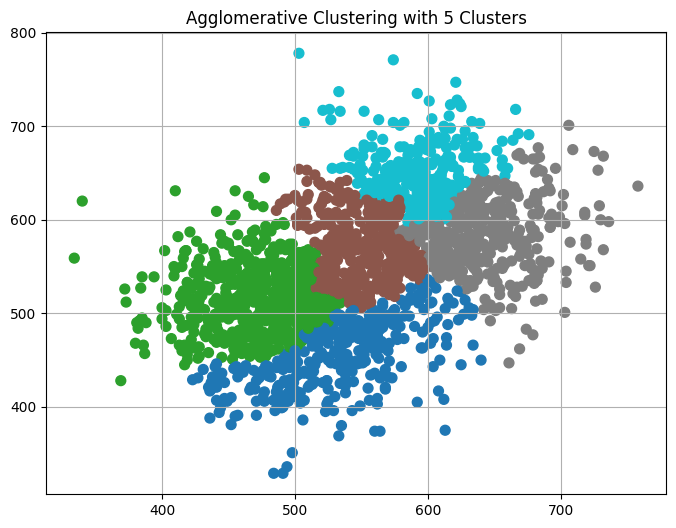

Number of clusters: 5
Labels Distribution: [353 594 394 390 316]


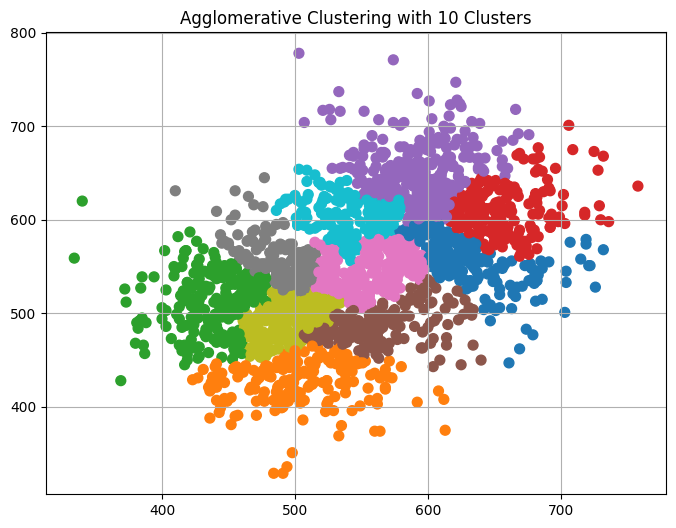

Number of clusters: 10
Labels Distribution: [207 191 223 183 316 162 234 142 229 160]


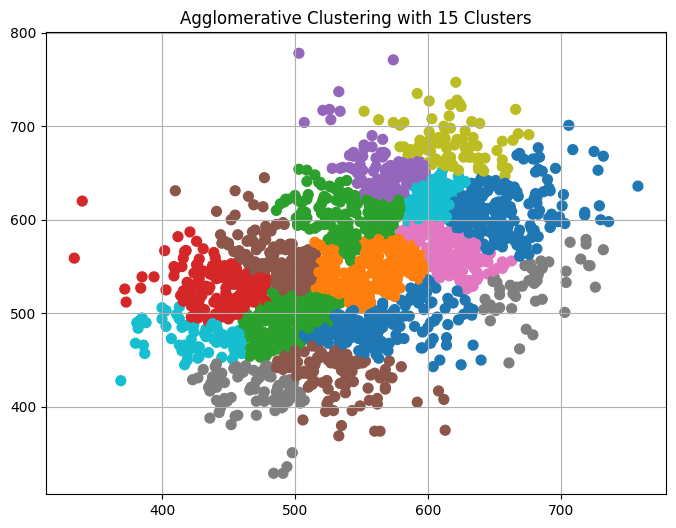

Number of clusters: 15
Labels Distribution: [162 183 234 229 160 154 116 142 109 157  50  82  82  69 118]


In [76]:
X = np.loadtxt('data2.txt', usecols=(0, 1), skiprows=1)

for n_clusters in [3, 5, 10, 15]:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(f"Agglomerative Clustering with {n_clusters} Clusters")
    plt.grid(True)
    plt.show()

    print(f"Number of clusters: {n_clusters}")
    print(f"Labels Distribution: {np.bincount(labels)}")


In [ ]:
#N = 3
#Broad groups, high intra-cluster variance
#N = 5
#More granularity, better-separated regions
#N = 10
#Most clusters are well-defined
#N = 15
#Possible over-fragmentation or small clusters